# Predicting type of breast cancer using MP neuron model:

## 1. Load data:

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [3]:
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
print(breast_cancer.target_names)
print(data['class'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: class, dtype: int64


In [5]:
data.groupby('class').describe()

mean radius                                                             \
            count       mean       std     min     25%     50%    75%    max   
class                                                                          
0           212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1           357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

      mean texture             ... worst symmetry          \
             count       mean  ...            75%     max   
class                          ...                          
0            212.0  21.604906  ...       0.359225  0.6638   
1            357.0  17.914762  ...       0.298300  0.4228   

      worst fractal dimension                                                  \
                        count      mean       std      min       25%      50%   
class                                                                           
0                       212.0  0.091530  0.021553  0.05504  0.076302  0.08760   
1                       357.0  0.079442  0.013804  0.05521  0.070090  0.07712   

                         
            75%     max  
class                    
0      0.102625  0.2075  
1      0.085410  0.1486  

[2 rows x 240 columns]

# 2. Train Test Split:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop('class',axis = 1)
Y = data['class']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,random_state = 1,test_size = 0.1)

Explaining each parameters:
- stratify -> it will split the data in such way that both train and test data will have similar number of features. eg. here both test and train datasets will have almost equal number of records with benign and maligment cancers.
- random_state -> it is the seed value provided to function. If you that function gives same data every time then manually set seed value
- test_size -> It is the ratio of test data size and total data size

In [9]:
print(X_train.shape, X_test.shape)

(512, 30) (57, 30)


See 90% records is in train and rest is in test.

In [10]:
print(Y_train.mean())
print(Y_test.mean())

0.626953125
0.631578947368421


See there is an almost similar distribution in train and test dataset

## 3. Binarisation of data:

since MP neuron only takes binary inputs. So we need to binarise the data.

Here is how the data is spreaded.

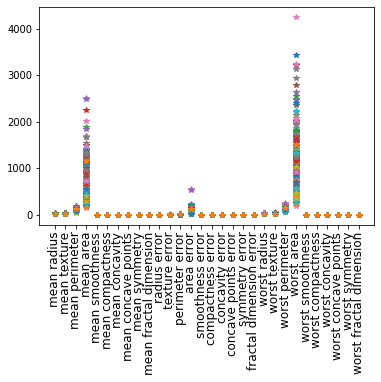

In [11]:
plt.plot(X_train.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

In [12]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels = [0,1])

Using pandas.cut to divide data in two halves with labels 0 and 1.

Now plot this data

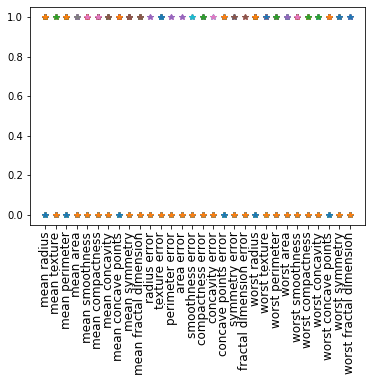

In [13]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

Similarly do for X_test

In [14]:
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels = [0,1])
# convert to np array 
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

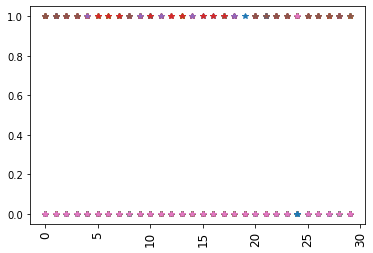

In [15]:
plt.plot(X_binarised_test.T,"*")
plt.xticks(rotation = 'vertical',fontsize = 'large')
plt.show()

## 3. Learning parameters

MP neuron model have only one parameter. So brute force search can be used to find that parameter.
So we will try different values of b ($w_0$) and stop when we find the value which minimize the loss function.
- $\sum{x_i} \geq b $ then y = 1,otherwise y = 0.
- So the maximum value of this sum can be ( in this problem ) 30. Since there 30 parameters.
- So we will iterate through all the values in the range of 0 to 30, And calculate the loss function. The value of b which will give the min value of loss function will be set.

In [16]:
b = 0
accurate_rows = 0
y_pred_train = []

for b in range(X_binarised_train.shape[1] + 1):
    for x,y in zip(X_binarised_train,Y_train):
        y_pred = (np.sum(x) >= b)
        accurate_rows += (y == y_pred)
        y_pred_train.append(y_pred)
    print(b, accurate_rows, accurate_rows / X_binarised_train.shape[0])
    accurate_rows = 0

0 321 0.626953125
1 123 0.240234375
2 95 0.185546875
3 77 0.150390625
4 79 0.154296875
5 93 0.181640625
6 110 0.21484375
7 125 0.244140625
8 141 0.275390625
9 153 0.298828125
10 160 0.3125
11 168 0.328125
12 172 0.3359375
13 176 0.34375
14 180 0.3515625
15 183 0.357421875
16 188 0.3671875
17 189 0.369140625
18 191 0.373046875
19 191 0.373046875
20 191 0.373046875
21 191 0.373046875
22 191 0.373046875
23 191 0.373046875
24 191 0.373046875
25 191 0.373046875
26 191 0.373046875
27 191 0.373046875
28 191 0.373046875
29 191 0.373046875
30 191 0.373046875


Here we can see that maximum accuracy we are getting is 62%, which is happened when we prediced all the output as 1 but our model should atleast give more accuracy than this. Reason for such accuracy is misclassification of inputs during binarisation. 

In [17]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Observe the table given above.
- We can see that mean value of all the parameters for the input labeled 0 have higher value than the corresponding mean values of the parameter for the input labeled 1.
- But during binarisation we labeled inputs with higher value as 1 and labeled others with 1.
- Now trying again after interchanging this label.

## 4. Binarisation of data and learning parameters ( Again! )

In [18]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels = [1,0])
X_binarised_test = X_test.apply(pd.cut,bins = 2 , labels = [1,0])
# Convert dataframes to np arrays
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [19]:
b = 0 
y_pred_train = []
accurate_row = 0
for b in range(X_binarised_train.shape[1] + 1):
    for x,y in zip(X_binarised_train,Y_train):
        y_pred = (np.sum(x) >= b)
        accurate_rows += (y_pred == y)
        y_pred_train.append(y_pred)
    print(b,accurate_rows, accurate_rows / X_binarised_train.shape[0])
    accurate_rows = 0

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 321 0.626953125
14 323 0.630859375
15 324 0.6328125
16 329 0.642578125
17 332 0.6484375
18 336 0.65625
19 340 0.6640625
20 344 0.671875
21 352 0.6875
22 359 0.701171875
23 371 0.724609375
24 387 0.755859375
25 402 0.78515625
26 419 0.818359375
27 433 0.845703125
28 435 0.849609375
29 417 0.814453125
30 389 0.759765625


As we can see the maximum accuracy has increased to 85%. It is achieved when b = 28.

## 5. Evaluation on test data:

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
b = 28

y_pred_test = []

for x in X_binarised_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test,Y_test)
print(accuracy)

0.7894736842105263


## Extra: MP Neuron class:
lets make class for MP neuron.

In [22]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self,x):
        return (sum(x) >= self.b)
    
    def predict(self,X):
        y = []
        for x in X:
            result = self.model(x)
            y.append(result)
        return np.array(y)
    
    def fit(self,X,Y):
        accuracy = {}
        
        for b in range(0, X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred,Y)
            
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b :',best_b)
        print('Highest accuracy :',accuracy[best_b])
            

In [23]:
mpn = MPNeuron()
mpn.fit(X_binarised_train,Y_train)

Optimal value of b : 28
Highest accuracy : 0.849609375


In [24]:
y_test_pred = mpn.predict(X_binarised_test)
accuarcy = accuracy_score(y_test_pred,Y_test)
print(accuracy)

0.7894736842105263
